## Entrega Final

- Davi Emediato: 20183012896
- Gabriel Ribeiro: 20183006066
- Rodrigo Gomes: 20183011718

### Desafios

#### Tempo limite entre os acessos

A classe `Scheduler` possui o método `get_next_url()` cujo obetivo é obter a próxima URL da fila do escalonador, assim, este método retorna uma tupla da próxima URL contendendo a `url` e a `profundidade`.

Dessa forma, uma das dificuldades enfrentadas pelo grupo esteve na percepcão do tempo limite entre os acessos a determinado servidor.

Primeiramente, foi adicionado o método `sleep` para tal funcionalidade, entretanto, após o desenvolvimento do trabalho, foi percebido que na própria classe do `Domain` possui tal variável como atributo: `time_limit_between_requests`. Assim como, o metodo `is_accessible` responsável por tal tratamento.


#### Page count

Outra dificuldade enfrentada pelo grupo foi a utilizacao da variavel `page_count` no fluxo de coleta do `crawler`, mais especificamente no momento de incrementar este valor.


#### Python Multithreading

Também, uma das dificuldades do grupo foi na percepção que a própria classe do `PageFetcher` já era uma `Thread`. 

Anteriormente, uma das abordagens escolhidas pelo grupo foi de instanciar uma classe do tipo `Process` e atribuir a uma variável, entretanto, foi verificado que tal linha de racioncínio proporcionava um resultado fora do esperado.



### Arquitetura utilizada

De modo geral, a arquitetura foi baseada em três classes principais:

-   Domain
-   Page Fetcher
-   Scheduler

A classe `Domain` é responsável por armazenar e caracterizar um domínio. Assim, esta possui informações como o tempo limite de acesso entre os servidores, o nome do respectivo domínio e o tempo desde o último acesso a determinado domínio.

A classe `Page Fetcher` é responsável por realizar as requisições das URLs obtidas, dessa forma, sendo as `threads` e possibilitando uma abordagem arquitetural de multiplas threads.

A classe `Scheduler` é responsável por armazenar as filas de URLs a serem requisitadas por servidor. Dessa forma, possui como atributo a principal estrutura de dados utilizada em toda lógica da recuperação de informação, sendo um `OrderedDict` em que as chaves são os servidores (objeto da classe `Domain`) e o valor será uma lista de tuplas com as URLs e sua profundidade.


### URLs seeds utilizadas 

Os seguintes domínios foram utilizados como `seeds`:

-   https://www.hltv.org/
-   https://ge.globo.com/
-   https://www.terra.com.br/



### Como foi feito?

Primeiramente, foi definido os seguintes atributos para o coletor:

    -   Número máximo de páginas coletadas.
    -   Profundidade máxima por domínio.
    -   Número de threads utilizadas.
    -   URLs sementes.
    -   User Agent, respeitando as condições estabelicidas no roteiro.

Assim, de modo inicial, é instanciado um escalonador do tipo `Scheduler`, sendo este possuindo uma fila de páginas coletadas através da lógica de busca em largura, de forma que, a mesma URL não é coletada mais de uma vez e o tempo limite de acesso entre os servidores seja respeitado.

Seguindo este raciocínio, deve ser instanciado as `threads` do tipo `PageFetcher`, visando uma abordagem de multiplas threads. Dessa forma, dado uma página acessada e coletada, deve-se extrair os links presentes na mesma e inseri-las na fila do escalonador daquele servidor em questão. Assim, alguns cuidados devem ser tomados, como, por exemplo, html mal formatados, o tipo de enconding da página e também páginas que não existem ou não podem ser acessados no momento da coleta.

É importante destacar que o coletor desenvolvido respeita os protocolos de exclusão de robôs. Assim, tal verificação é realizada na classe `Scheduler` pelo método `can_fetch_page`, que por meio da biblioteca `Robot Parser` é criado um objeto do tipo `RobotFileParser` em que, ao utilizar a funcionalidade de `can_fetch` é verificado os critérios de coleta da página em questão, como, por exemplo, `noindex`, `nofollow`.

Também, de modo a respeitar a quantidade de tempo entre requisições à um mesmo servidor, a classe `Domain`, por meio do método `is_acessible`, é verificado se o servidor em questão respeita o tempo limite pré definido, no caso, o mínimo de 30.

Além disso, para fins de análise, é extraído o tempo total gasto da coleta, por meio da biblioteca `time` do Python.



### Funcionamento

As células abaixo representam a lógica supracitada assim como o funcionamento do mesmo.

In [3]:
# Importacoes

import time
from crawler.page_fetcher import PageFetcher
from crawler.scheduler import Scheduler
from urllib.parse import urlparse

In [23]:
# Constantes do coletor

page_limit = 100
depth_limit = 6
usr_agent = 'CEFET-MG-RI-BOT/1.0 (https://uttermost-card-8b9.notion.site/About-CEFET-MG-RI-BOT-1-0-49c8e0792ba74010b3207c662944d793)'
max_page_fetchers = 50
urls_seeds = ['https://hltv.org', 'https://ge.globo.com/', 'https://www.terra.com.br/']

In [24]:
# Instancias das classes bases e realizando o processo de coleta

start = time.time()

urls = [urlparse(url) for url in urls_seeds]
scheduler = Scheduler(usr_agent, page_limit, depth_limit, urls)
page_fetchers = [PageFetcher(scheduler) for _ in range(max_page_fetchers)]

for page_fetcher in page_fetchers:
    page_fetcher.start()

for page_fetcher in page_fetchers:
    page_fetcher.join()

end = time.time()

print(f'O tempo total gasto foi: {end - start}')

[+] Adicionada página: https://hltv.org
[+] Adicionada página: https://ge.globo.com/
[+] Adicionada página: https://www.terra.com.br/
[+] Adicionada página: https://www.terra.com.br/#trr-ctn-general
[+] Adicionada página: https://www.terra.com.br
[+] Adicionada página: https://mail.terra.com.br
[+] Adicionada página: https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/ao-vivo/athletico-pr-x-avai/72172/
[+] Adicionada página: https://www.terra.com.br/esportes/futebol/copa-do-brasil/ao-vivo/brasiliense-x-atletico-mg/72169/
[+] Adicionada página: https://www.terra.com.br/nos/
[+] Adicionada página: https://www.terra.com.br/comunidade/visao-do-corre/
[+] Adicionada página: https://www.terra.com.br/esportes/
[+] Adicionada página: https://www.terra.com.br/noticias/
[+] Adicionada página: https://www.terra.com.br/vida-e-estilo/horoscopo/
[+] Adicionada página: https://www.terra.com.br/diversao/
[+] Adicionada página: https://www.terra.com.br/economia/
[+] Adicionada página: https://

### Velocidade de coleta

Tendo como base o seguinte teste:

    - Aumentar o número de threads 1 a 20 de 5 em 5 passos e, logo após, de 30 a 100 com 20 passos. 

Pode-se gerar o seguinte gráfico:





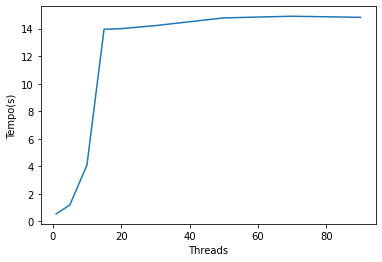

In [25]:
import seaborn as sns
import pandas as pd

# Array com os tempos obtidos
times = [0.55, 1.20, 4.10, 13.95, 14.0, 14.22, 14.78, 14.90, 14.82]

# Array com a variacao do número de threads
max_threads = [1, 5, 10, 15, 20, 30, 50, 70, 90]

d = {'Threads': max_threads, 'Tempo(s)': times}
df = pd.DataFrame(data=d)

fmri = sns.load_dataset("fmri")
sns.lineplot(x="Threads", y="Tempo(s)", data=df)

Observando o gráfico acima pode-se inferir que o tempo gasto da coleta aumentou a partir do momento que o número de threads cresceu, indicando uma relação diretamente proporcional até basicamente o ponto de 20 threads.

A partir deste valor, o tempo gasto se manteve na faixa dos 14 segundos, indicando uma possível estabilização independente do aumento do número de multiplas threads.

Dessa forma, partindo desse ponto observável, cria-se o interesse em entender o porque da abordagem de multiplas threads se tornar devagar, visto que era esperado pelo grupo que, com o aumento do número de threads, o tempo gasto pela coleta se tornaria menor, justamente, pela arquitetura paralela de requisições.

Entretanto, tal acontecimento pode ser explicado pelo modo em como essa lógica foi implementada, principalmente, no que diz respeito em como as threads são instanciadas, tornando este tempo cada vez mais lento com o aumento das mesmas.

### Descrição do coletor

O seguinte `link` hospeda a página pessoal com a descrição do coletor desenvolvido:

-   [Descrição](https://uttermost-card-8b9.notion.site/About-CEFET-MG-RI-BOT-1-0-49c8e0792ba74010b3207c662944d793)